#### Logistic Regression on CSV

Epoch 1/100


C:\Users\Yash\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5447 - loss: 0.6761 - val_accuracy: 0.8500 - val_loss: 0.5814
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8157 - loss: 0.5674 - val_accuracy: 0.9000 - val_loss: 0.4852
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8868 - loss: 0.4663 - val_accuracy: 0.9167 - val_loss: 0.3960
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8509 - loss: 0.4133 - val_accuracy: 0.9167 - val_loss: 0.3303
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8977 - loss: 0.3348 - val_accuracy: 0.9167 - val_loss: 0.2844
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8831 - loss: 0.2976 - val_accuracy: 0.9167 - val_loss: 0.2584
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9019 - loss: 0.2418 - val_accuracy: 0.9000 - val_loss: 0.2499
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8905 - loss: 0.2418 - val_accuracy: 0.9000 - val_l

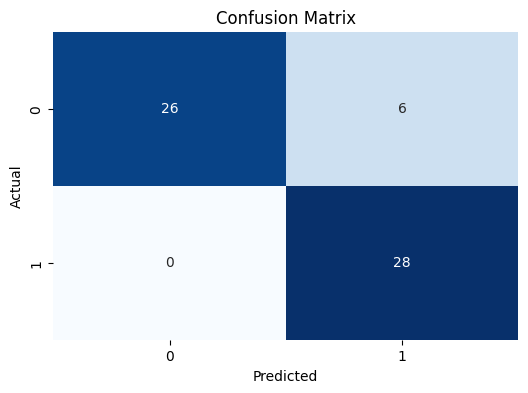

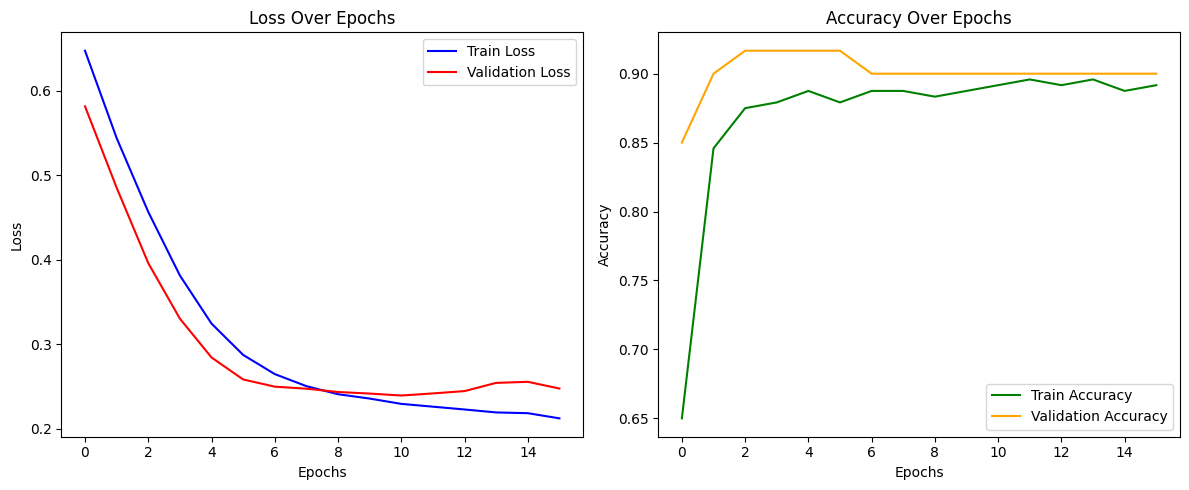

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("heart_disease_data.csv")

# Features and target
X = df.drop(columns=["heart_disease"]).values
y = df["heart_disease"].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build improved model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop], verbose=1)

# Predictions
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


#### Logistic Regression on DataFrame

C:\Users\Yash\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5130 - loss: 0.7589 - val_accuracy: 0.4650 - val_loss: 0.8071
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5076 - loss: 0.7602 - val_accuracy: 0.4650 - val_loss: 0.7946
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 0.7341 - val_accuracy: 0.4750 - val_loss: 0.7835
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.7298 - val_accuracy: 0.4750 - val_loss: 0.7732
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5540 - loss: 0.7030 - val_accuracy: 0.4600 - val_loss: 0.7639
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5248 - loss: 0.7258 - val_accuracy: 0.4500 - val_loss: 0.7553
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5455 - loss: 0.7036 - val_accuracy: 0.4450 - val_loss: 0.7483
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5297 - loss: 0.7062 - val_accuracy: 0.4550 - val_loss:

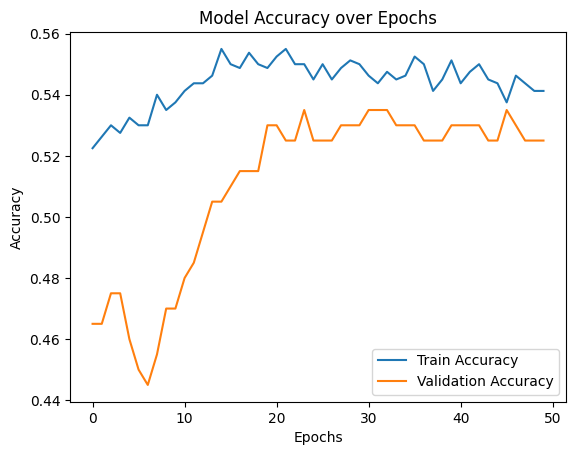

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


data = {
    "age": np.random.randint(30, 80, 1000),
    "blood_pressure": np.random.randint(90, 180, 1000),
    "cholesterol": np.random.randint(150, 300, 1000),
    "physical_activity_level": np.random.uniform(0, 10, 1000),
    "heart_disease": np.random.randint(0, 2, 1000)
}
df = pd.DataFrame(data)



# Convert to NumPy arrays
X = np.column_stack((df["age"], df["blood_pressure"], df["cholesterol"], df["physical_activity_level"]))
y = np.array(df["heart_disease"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# TensorFlow model (Logistic regression)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)



# Model Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
# print("Confusion Matrix:")
# print(conf_matrix)

new_patient = np.array([[55, 140, 220, 5]]) 
new_patient_scaled = scaler.transform(new_patient)
prediction = (model.predict(new_patient_scaled) > 0.5).astype(int)
print(f"Predicted Heart Disease (1=Yes, 0=No): {prediction[0][0]}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()